# Прогнозирование временных рядов

Данные по акциям «Amazon» взяты с 2015 по 2020 годы с [yahoo.finance.com]( http://yahoo.finance.com).

__Задача:__ Прогнозирование стоимости акций «Amazon» на 2021 год

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Подготовка данных

In [2]:
df = pd.read_csv("AMZN.csv") 
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-28,665.559998,675.500000,665.500000,675.200012,675.200012,3783600
1,2015-12-29,677.979980,696.440002,677.890015,693.969971,693.969971,5735000
2,2015-12-30,691.890015,695.489990,686.380005,689.070007,689.070007,3519000
3,2015-12-31,686.080017,687.750000,675.890015,675.890015,675.890015,3749600
4,2016-01-04,656.289978,657.719971,627.510010,636.989990,636.989990,9314500


In [3]:
#Проверим на пропуски
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
#Выберем нужные предиктант и предиктор
df = df[["Date","Close"]] # select Date and Price

In [5]:
#Переименуем колонки для работы Prophet
df = df.rename(columns = {"Date":"ds","Close":"y"}) 
df.head()

,ds,y
0,2015-12-28,675.200012
1,2015-12-29,693.969971
2,2015-12-30,689.070007
3,2015-12-31,675.890015
4,2016-01-04,636.989990


## Прогноз

In [6]:
from fbprophet import Prophet

In [7]:
# Сезонная компонента по дням
m = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
m.fit(df) 

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [8]:
#Делаем прогноз на 365 дней
future = m.make_future_dataframe(periods=365) 
prediction = m.predict(future)

In [9]:
# Нарисуем график с границами прогноза
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

iplot([
    go.Scatter(x=df['ds'], y=df['y'], name='fact'),
    go.Scatter(x=prediction['ds'], y=prediction['yhat'], name='prediction'),
    go.Scatter(x=prediction['ds'], y=prediction['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=prediction['ds'], y=prediction['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=prediction['ds'], y=prediction['trend'], name='trend')
])

По результатам прогноза акции будут демонстрировать резкий подорожание. Из-за активного роста в 2020 году, тренд изменился, что повлияло на модель.

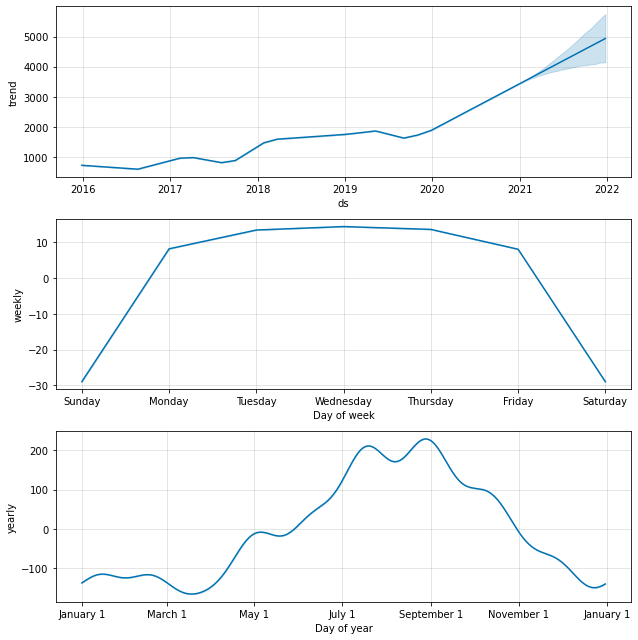

In [10]:
#Нарисуем графики прогноза каждой компоненты
y = m.plot_components(prediction)
plt.show()

Анализ компонентов, говорит о восходящем тренде цены акций, акции дороже всего в сентябре и по средам.